<a href="https://colab.research.google.com/github/Jadrianp29/testreko/blob/main/Solucion_Reto_SC_63_%3CJesusAdrianAguilarPerez%3E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introducción:
Los programas de telemarketing se han venido usando por las empresas durante años como una forma de comunicarse con clientes potenciales de manera directa por vía telefónica. En los últimos años el uso de las técnicas de inteligencia artificial ha permitido potencializar el impacto de estos programas de mercadotecnia.

Un banco ha lanzado un nuevo plan de inversión a largo plazo a través de un programa de telemarketing y desea saber que tan exitoso se puede considerar este programa utilizando técnicas de aprendizaje supervisado. El programa es lanzado a clientes del banco, por lo que este estudio ayudará a optimizar los esfuerzos al conocer las características de los clientes más propensos a adquirir dicho plan de inversión.

En la presente actividad tu objetivo es predecir si el entrevistado adquirirá el plan de inversión bancario de acuerdo con varias características que se conocen de dicho cliente.

Objetivo:

Diseñar e implementar un modelo de aprendizaje supervisado que pueda predecir si una persona adquiere o no un plan de inversión bancaria a través de una entrevista telefónica.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,normalize,OrdinalEncoder
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder


Elaborar un análisis descriptivo que incluya la cantidad y tipo de variables que se tienen en el conjunto de datos original, así como la cantidad de datos perdidos en caso de existir.

In [2]:
credit=pd.read_csv('/content/bank_marketing_RETO_DS_AS (1).csv')

In [3]:
credit.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,self-employed,married,tertiary,no,2666,no,no,cellular,10,nov,318,2,97,6,success,yes
1,29,unemployed,single,unknown,no,1584,no,no,cellular,6,sep,245,1,-1,0,unknown,yes
2,41,blue-collar,married,secondary,no,2152,yes,no,cellular,17,nov,369,1,-1,0,unknown,no
3,50,blue-collar,married,secondary,no,84,yes,no,cellular,17,jul,18,8,-1,0,unknown,no
4,40,admin.,married,secondary,no,0,no,no,cellular,28,jul,496,2,182,11,success,yes


In [4]:
credit.info()
credit['y'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   object
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   object
 16  y          9000 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


,count
y,
no,5213
yes,3787


In [5]:
credit.nunique()

,0
age,74
job,12
marital,3
education,4
default,2
balance,3476
housing,2
loan,2
contact,3
day,31


In [6]:
credit['default'].value_counts()

,count
default,
no,8865
yes,135


In [7]:
credit['job'].value_counts()

,count
job,
management,1999
blue-collar,1688
technician,1485
admin.,1004
services,771
retired,594
self-employed,319
student,312
unemployed,290


In [8]:
credit['marital'].value_counts()

,count
marital,
married,5124
single,2837
divorced,1039


In [9]:
credit['education'].value_counts()

,count
education,
secondary,4486
tertiary,2893
primary,1244
unknown,377


In [10]:
credit['housing'].value_counts()

,count
housing,
no,4564
yes,4436


In [11]:
credit['loan'].value_counts()

,count
loan,
no,7820
yes,1180


In [12]:
credit['contact'].value_counts()


,count
contact,
cellular,6438
unknown,1982
telephone,580


In [13]:
credit['poutcome'].value_counts()

,count
poutcome,
unknown,6783
failure,1006
success,770
other,441


In [14]:
credit['age'].describe()

,age
count,9000.000000
mean,41.090556
std,11.664253
min,18.000000
25%,32.000000
50%,39.000000
75%,49.000000
max,95.000000


In [15]:
credit['job'].describe()

,job
count,9000
unique,12
top,management
freq,1999


El analisis descriptivo muestra que tenemos 9000 filas y 17 columnas, no tenemos valores nulos y las variables se dividen en:
Categoricas: 'job','marital','education','default','housing','loan','contact','month','poutcome'
Numericas: 'age','Balance','day','duration','campaign','pdays'
La variable de salidad 'y' es categorica con valores 1 correspondiendo a si adquirieron el plan de inversion y 0 correspondien do a los que no


Realizar la transformación de datos categóricos y numéricos correspondientes.

In [16]:
categorical_columns=['job','marital','education','default','housing','loan','contact','month','poutcome','y']
creditX = credit[categorical_columns]
encoder = LabelEncoder()
creditX_encoded = creditX.apply(encoder.fit_transform)
creditX_encoded = pd.DataFrame(creditX_encoded, columns=categorical_columns)
numerical_columns=['age','balance','day','duration','campaign','pdays','previous']
creditb = credit[numerical_columns]
encoder2 = StandardScaler()
creditb = encoder2.fit_transform(creditb)
creditb = pd.DataFrame(creditb, columns=numerical_columns)
credit1 = pd.concat([creditX_encoded, creditb], axis=1)
credit1.head()


,job,marital,education,default,housing,loan,contact,month,poutcome,y,age,balance,day,duration,campaign,pdays,previous
0,6,1,2,0,0,0,0,9,2,1,-0.865132,0.390563,-0.673417,-0.106352,-0.189988,0.431706,2.357808
1,10,2,3,0,0,0,0,11,3,1,-1.036605,0.033567,-1.152755,-0.323016,-0.555270,-0.478348,-0.356939
2,1,1,1,0,1,0,0,9,3,0,-0.007764,0.220974,0.165425,0.045016,-0.555270,-0.478348,-0.356939
3,1,1,1,0,1,0,0,5,3,0,0.763867,-0.461344,0.165425,-0.996754,2.001709,-0.478348,-0.356939
4,0,1,1,0,0,0,0,5,2,1,-0.093501,-0.489059,1.483605,0.421953,-0.189988,1.221038,4.620098


6.a Justifica el uso de LabelEncoder o OneHotEcoder.
Se utiliza Label_endcoder ya que con one_hot_encoder se crean numerosas categorias que no son optimas para el modelo.

Realizar la partición de tus datos en los conjuntos de entrenamiento, validación y prueba.

In [17]:
X = credit1[['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome']]
Y=credit1['y']
X = X.values
Y = Y.values
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(X, Y, train_size=0.6, random_state=42)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, train_size=0.2)

Construir 2 modelos supervisados, con sus porcentajes de predicción y matrices de confusión.

In [18]:
clf=LogisticRegression(C=1.0,solver='newton-cg',penalty='l2',random_state=12,max_iter=300)
modeloRL=clf.fit(x_train,y_train)
print('Regresion Logistica accuracy',modeloRL.score(x_validation,y_validation))
pr=modeloRL.predict(x_validation)
confusion_matrix(y_validation,pr)

Regresion Logistica accuracy 0.8013888888888889


array([[365,  48],
       [ 95, 212]])

In [19]:
print("Valores-etiquetas reales: %s" % np.ravel(y_test[0:20]))
print("Predicciones del modelo: %s" % pr[0:20])

Valores-etiquetas reales: [0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0]
Predicciones del modelo: [1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0]


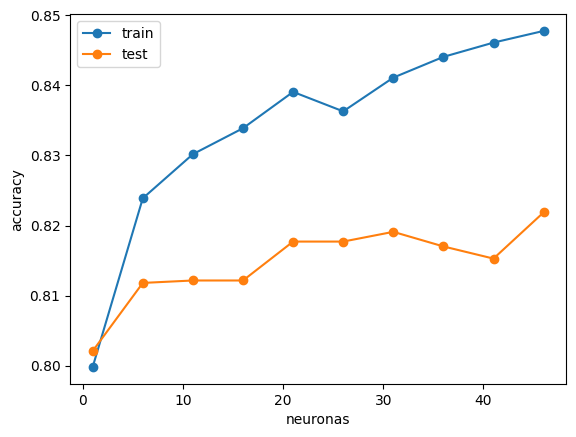

In [20]:
neuronas = [i for i in range(1, 50, 5)]

train_scores, test_scores = [], []
train_errors, test_errors = [], []

for i in neuronas:
    model = MLPClassifier(hidden_layer_sizes=(i, i),
                          max_iter=3000,
                          random_state=12,
                          alpha=0.5)
    model.fit(x_train, y_train)

    train_yhat = model.predict(x_train)

    train_loss = mean_absolute_percentage_error(y_train, train_yhat)
    train_errors.append(train_loss)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)

    test_yhat = model.predict(x_test)

    test_loss = mean_absolute_percentage_error(y_test, test_yhat)
    test_errors.append(test_loss)

    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)

import matplotlib.pyplot as plt

plt.plot(neuronas, train_scores, '-o', label='train')
plt.plot(neuronas, test_scores, '-o', label='test')
plt.xlabel('neuronas')
plt.ylabel('accuracy')
plt.legend()
plt.show()

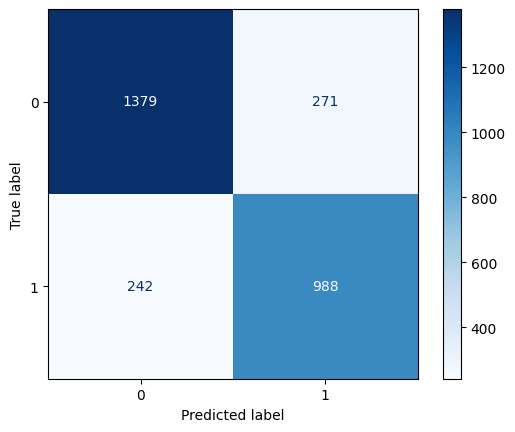

In [21]:
cm = confusion_matrix(y_test, model.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # Puedes cambiar el color si lo deseas
plt.show()

13.a Incluye tus conclusiones de este problema en particular, ¿qué puedes decir acerca del uso de técnicas de inteligencia artificial en problemas de mercadotecnia?
1)Se observa un buen ajuste entre valores train y test obteniendo un dato de accuracy de 0.85 usando 40 neuronas.
2)Se selecciona el metodo de redes neuronales ya que tiene una mayor accuracy y el porcentaje de falsos positivos y falsos negativos es similar al de regresion logistica
3)EL uso de intelegencia en mercadotecnia puede ayudar a predecir si un cliente adquirira un producto, si una campaña es efectiva o si una estrategia comercial fue efectiva o no etc.